# UT1 · Práctica 1 — Exploración del dataset *Iris*

**Materia:** Ingeniería de Datos - UCU

**Estudiante:** Agustina Esquibel

**Fecha:** 13/08/2025

---

## Objetivos
1. Cargar el dataset **Iris**.
2. Revisar su estructura y calidad de datos.
3. Generar estadísticas y visualizaciones básicas.
4. Documentar un diccionario de datos.
5. Redactar insights claros y respaldados.

## 1. Verificar entorno

In [ ]:
# ==============================
# Verificar entorno
# ==============================
import sys, pandas as pd, seaborn as sns, matplotlib
print(sys.version)
print(pd.__version__, sns.__version__, matplotlib.__version__)

3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
2.2.2 0.13.2 3.10.0


 ## Guardar resultados en Google Drive

In [ ]:
# ==============================
# Guardar resultados en Google Drive
# ==============================
from pathlib import Path

try:
    # En Colab montamos Google Drive para que los outputs no se pierdan
    from google.colab import drive
    drive.mount('/content/drive')

    # Carpeta en Drive
    ROOT = Path('/content/drive/MyDrive/UT1-Practica1')
except Exception:
    # Si NO estás en Colab, guarda en el directorio local
    ROOT = Path.cwd() / 'UT1-Practica1'

# Directorios de salida organizados
PLOTS_DIR  = ROOT / 'results' / 'visualizaciones'   # Gráficos (PNG/JPG)
PERF_DIR   = ROOT / 'results' / 'perfiles'          # Reportes tipo profiling
REPORT_DIR = ROOT / 'results' / 'reportes'          # Diccionarios, insights, resúmenes

# Crear las carpetas si no existen
for d in (PLOTS_DIR, PERF_DIR, REPORT_DIR, REPORT_DIR):
    d.mkdir(parents=True, exist_ok=True)

print('Outputs →', ROOT)

Mounted at /content/drive
Outputs → /content/drive/MyDrive/UT1-Practica1


##Investigar el dataset

## Preguntas de negocio

Para guiar el análisis exploratorio del dataset Iris, planteamos las siguientes preguntas.  
Se ordenan por prioridad, de mayor a menor, según el valor que aportan al entendimiento de los datos:

1. **¿Qué variables son más útiles para distinguir entre las especies de iris?**  
   *Prioridad alta.* Es fundamental identificar las variables más discriminantes, ya que guiarán cualquier análisis posterior.  

2. **¿Existen correlaciones fuertes entre variables (ejemplo: largo y ancho de pétalos)?**  
   *Prioridad alta.* Entender relaciones entre variables ayuda a detectar redundancias o información clave.  

3. **¿Cómo se distribuyen los datos de cada especie? ¿El dataset está balanceado?**  
   *Prioridad media.* El balance asegura que las comparaciones entre especies sean justas y representativas.  

4. **¿Aparecen valores atípicos o rangos no plausibles en las medidas?**  
   *Prioridad media.* Detectar problemas de calidad de datos es esencial antes de cualquier análisis profundo.  

5. **¿Qué diferencias estadísticas básicas se observan entre especies (medias, desviaciones)?**  
   *Prioridad baja.* Aunque aporta valor descriptivo, complementa lo que ya se puede ver con gráficos y correlaciones.  
   

## Configuración de carpetas de resultados

In [ ]:
# CONFIGURACIÓN DE CARPETAS DE RESULTADOS
# Este bloque define y crea las carpetas donde se guardarán:
#  - Visualizaciones (PNG)
#  - Perfiles estadísticos (CSV)
#  - Reportes (diccionario de datos, range_check, etc.)
# Conviene ponerlo DESPUÉS de "Guardar resultados en Google Drive"
# =========================================================

from pathlib import Path  # Librería estándar para manejar rutas de archivos/carpetas

# Carpeta base: "." significa el directorio actual
BASE_DIR = Path('.')

# Definimos rutas específicas dentro de "results/"
VIS_DIR  = BASE_DIR / 'results' / 'visualizaciones'  # imágenes (gráficos .png)
PERF_DIR = BASE_DIR / 'results' / 'perfiles'         # perfiles estadísticos (CSV)
REP_DIR  = BASE_DIR / 'results' / 'reportes'         # reportes (diccionario .md, rangos .csv)

# Creamos las carpetas si no existen
#  - parents=True: crea también las carpetas padres (ej. "results/")
#  - exist_ok=True: no da error si la carpeta ya existe
for d in [VIS_DIR, PERF_DIR, REP_DIR]:
    d.mkdir(parents=True, exist_ok=True)

print("✅ Carpetas listas:", VIS_DIR, PERF_DIR, REP_DIR)

✅ Carpetas listas: results/visualizaciones results/perfiles results/reportes


## Cargar datos



En esta práctica usaremos principalmente las opciones **A (seaborn)** y **B (scikit-learn)** para cargar el dataset Iris, ya que son rápidas y no requieren configuraciones externas.  
Las opciones **C (Kaggle), D (manual)** y **E (URL pública)** se dejan documentadas como referencia, pero no se ejecutan en esta entrega.

In [ ]:
# A) Cargar Iris desde seaborn
import seaborn as sns

df = sns.load_dataset('iris')  # Origen A

# PISTAS: head/shape/dtypes
print("Dimensiones:", df.shape)
print("Tipos de datos:\n", df.dtypes)
df.head()

# README: documentar origen => seaborn.load_dataset("iris")

Dimensiones: (150, 5)
Tipos de datos:
 sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# B) Cargar Iris desde scikit-learn y convertir a DataFrame
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris(as_frame=True)
df = data.frame

# Renombrar columnas para consolidar nombres
df.rename(columns={
    "sepal length (cm)": "sepal_length",
    "sepal width (cm)": "sepal_width",
    "petal length (cm)": "petal_length",
    "petal width (cm)": "petal_width",
    "target": "species"
}, inplace=True)

# PISTAS: head/shape/dtypes
print("Dimensiones:", df.shape)
print("Tipos de datos:\n", df.dtypes)
df.head()

# README: documentar origen => sklearn.datasets.load_iris()

Dimensiones: (150, 5)
Tipos de datos:
 sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


A continuación se muestran las otras formas de cargar el dataset Iris. Estas celdas quedan comentadas porque requieren credenciales externas o subir archivos manualmente.

In [ ]:
# C) Cargar Iris desde Kaggle API (Colab)
#!pip -q install kaggle
#from google.colab import files

# Subir kaggle.json con tus credenciales de API
#files.upload()   # Origen C

# Configurar credenciales
#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json

# Descargar dataset Iris desde Kaggle y descomprimir
#!kaggle datasets download -d uciml/iris -p data
#!unzip -o data/iris.zip -d data

# Leer CSV en DataFrame
#import pandas as pd
#df = pd.read_csv("data/Iris.csv")

# Renombrar columnas para consolidar nombres
#df.rename(columns={
    #"SepalLengthCm": "sepal_length",
    #"SepalWidthCm": "sepal_width",
    #"PetalLengthCm": "petal_length",
    #"PetalWidthCm": "petal_width",
    #"Species": "species"
#}, inplace=True)

# PISTAS: head/shape/dtypes
#print("Dimensiones:", df.shape)
#print("Tipos de datos:\n", df.dtypes)
#df.head()

# README: documentar origen => Kaggle API (dataset uciml/iris)

In [ ]:
# D) Subir CSV manualmente (Colab)
#from google.colab import files
#import pandas as pd

# Subir archivo Iris.csv desde tu PC
#uploaded = files.upload()   # Origen D

# Cargar CSV a DataFrame
#df = pd.read_csv("Iris.csv")

# Renombrar columnas para consolidar nombres
#df.rename(columns={
    #"SepalLengthCm": "sepal_length",
    #"SepalWidthCm": "sepal_width",
    #"PetalLengthCm": "petal_length",
    #"PetalWidthCm": "petal_width",
    #"Species": "species"
#}, inplace=True)

# PISTAS: head/shape/dtypes
#print("Dimensiones:", df.shape)
#print("Tipos de datos:\n", df.dtypes)
#df.head()

# README: documentar origen => CSV manual subido a Colab (Iris.csv)

In [ ]:
# E) Cargar CSV desde URL pública
#import pandas as pd

# Origen E: URL pública del dataset Iris
#url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
#df = pd.read_csv(url)

# PISTAS: head/shape/dtypes
#print("Dimensiones:", df.shape)
#print("Tipos de datos:\n", df.dtypes)
#df.head()

# README: documentar origen => URL pública (GitHub uiuc-cse/data-fa14)

##Chequeos básicos y data dictionary

In [ ]:
# ==============================
# 5) Chequeos básicos y data dictionary
# ==============================

import os
import pandas as pd

# --- Chequeos básicos ---
print("Dimensiones:", df.shape)
print("\nTipos de datos:\n", df.dtypes)

isna = df.isna().sum()
print("\nValores faltantes por columna:\n", isna)

describe = df.describe(include='all').T
display(describe)

# Pista 1: si 'species' es texto, convertir a categoría
if df['species'].dtype != 'category':
    df['species'] = df['species'].astype('category')

# Pista 2: guardar describe e isna en results/perfiles/ para trazabilidad
os.makedirs("results/perfiles", exist_ok=True)
describe.to_csv("results/perfiles/desc.csv")          # estadísticas descriptivas
isna.to_csv("results/perfiles/missing_cnt.csv")       # conteo de faltantes por columna

# --- Mini diccionario de datos (markdown en el notebook) ---
data_dict = """
### Diccionario de Datos (Iris Dataset)

| Nombre       | Tipo     | Descripción           | Unidad |
|--------------|----------|-----------------------|--------|
| sepal_length | float64  | Longitud del sépalo   | cm     |
| sepal_width  | float64  | Ancho del sépalo      | cm     |
| petal_length | float64  | Longitud del pétalo   | cm     |
| petal_width  | float64  | Ancho del pétalo      | cm     |
| species      | category | Especie de la flor    | —      |
"""
print(data_dict)

Dimensiones: (150, 5)

Tipos de datos:
 sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object

Valores faltantes por columna:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
species,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0



### Diccionario de Datos (Iris Dataset)

| Nombre       | Tipo     | Descripción           | Unidad |
|--------------|----------|-----------------------|--------|
| sepal_length | float64  | Longitud del sépalo   | cm     |
| sepal_width  | float64  | Ancho del sépalo      | cm     |
| petal_length | float64  | Longitud del pétalo   | cm     |
| petal_width  | float64  | Ancho del pétalo      | cm     |
| species      | category | Especie de la flor    | —      |



##Plausibilidad y rangos

,feature,unidad,tipo,rango_esperado,%missing,obs_min,obs_max,flag
0,sepal_length,cm,float64,"[4.3, 7.9]",0.0,4.3,7.9,False
1,sepal_width,cm,float64,"[2.0, 4.4]",0.0,2.0,4.4,False
2,petal_length,cm,float64,"[1.0, 6.9]",0.0,1.0,6.9,False
3,petal_width,cm,float64,"[0.1, 2.5]",0.0,0.1,2.5,False


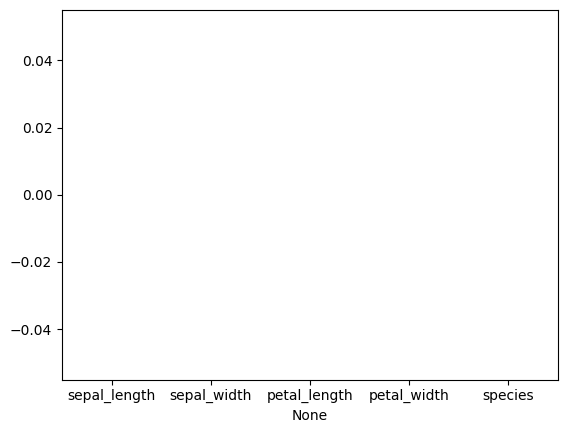

In [ ]:
import pandas as pd
import numpy as np

# 1) Identificar columnas numéricas
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# 2) Calcular min, max y %missing observados
obs = df[num_cols].agg(['min','max'])
pct_missing = df[num_cols].isna().mean()

# 3) Definir rangos esperados (Iris UCI, en cm)
expected_ranges = {
    "sepal_length": (4.3, 7.9),
    "sepal_width":  (2.0, 4.4),
    "petal_length": (1.0, 6.9),
    "petal_width":  (0.1, 2.5),
}

# 4) Construir tabla con las 8 columnas en el orden pedido
rows = []
for c in num_cols:
    exp_min, exp_max = expected_ranges[c]
    rango_esperado = f"[{exp_min}, {exp_max}]"
    # flag: True si hay algún valor fuera del rango esperado
    flag = not df[c].between(exp_min, exp_max).all()
    rows.append({
        "feature": c,
        "unidad": "cm",
        "tipo": str(df[c].dtype),
        "rango_esperado": rango_esperado,
        "%missing": round(pct_missing[c], 6),
        "obs_min": obs.loc['min', c],
        "obs_max": obs.loc['max', c],
        "flag": flag
    })

range_check = pd.DataFrame(rows, columns=[
    "feature","unidad","tipo","rango_esperado","%missing","obs_min","obs_max","flag"
])

display(range_check)
range_check.to_csv("range_check.csv", index=False)

# =====================================================
# 5.1) Missingness
# =====================================================
missing_cnt = df.isna().sum().sort_values(ascending=False)
missing_pct = (df.isna().sum() / len(df)).sort_values(ascending=False)

missing_cnt.to_csv("missing.csv")
missing_pct.to_csv("missing_pct.csv")

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=missing_pct.index, y=missing_pct.values)
plt.show()

# Análisis estadístico

In [ ]:
# --- Estadísticas descriptivas ---
desc = df.describe()
print("\n=== Estadísticas descriptivas ===")
print(desc)

# --- Correlaciones (Pearson y Spearman) ---
corr = df.select_dtypes(include='number').corr(method='pearson')
print("\n=== Correlaciones (Pearson) ===")
print(corr)

corr_spearman = df.select_dtypes(include='number').corr(method='spearman')
print("\n=== Correlaciones (Spearman) ===")
print(corr_spearman)

# --- Asimetría y Curtosis ---
skew_kurt = df.select_dtypes(include='number').agg(['skew', 'kurt'])
print("\n=== Asimetría (skew) y Curtosis (kurt) ===")
print(skew_kurt)

# --- Covarianzas ---
cov = df.select_dtypes(include='number').cov()
print("\n=== Covarianzas ===")
print(cov)

# Guardar resultados
desc.to_csv("results/perfiles/desc.csv")
corr.to_csv("results/perfiles/corr.csv")
corr_spearman.to_csv("results/perfiles/corr_spearman.csv")
skew_kurt.to_csv("results/perfiles/skew_kurt.csv")
cov.to_csv("results/perfiles/cov.csv")


=== Estadísticas descriptivas ===
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

=== Correlaciones (Pearson) ===
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000

=== Correlaciones (Spearman) ===
              sepal_len

# Duplicados e imbalance

In [ ]:
# --- Duplicados ---
duplicados = df.duplicated().sum()
print(f"\nCantidad de filas duplicadas: {duplicados}")

# --- Imbalance categórico ---
species_dist = df['species'].value_counts(normalize=True)
print("\nDistribución de especies (proporción):")
print(species_dist)

# Guardar resultados
species_dist.to_csv("results/perfiles/species_dist.csv")

# Categorías raras (<5%)
raras = species_dist[species_dist < 0.05]
if not raras.empty:
    print("\nCategorías raras (<5%):")
    print(raras)
else:
    print("\nNo hay categorías con menos de 5% de frecuencia.")


Cantidad de filas duplicadas: 1

Distribución de especies (proporción):
species
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64

No hay categorías con menos de 5% de frecuencia.


## Visualizaciones

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

PLOTS_DIR = "results/visualizaciones"
os.makedirs(PLOTS_DIR, exist_ok=True)

plt.style.use('seaborn-v0_8')   # estilo legible

# --- columnas numéricas ---
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# -----------------------------------------------------
# 1) Histogramas con KDE por especie (una imagen por variable)
# -----------------------------------------------------
for col in num_cols:
    plt.figure()
    sns.histplot(data=df, x=col, hue='species', kde=True,
                 stat='density', common_norm=False, element='step')
    plt.title(f'Histograma + KDE por especie: {col}')
    plt.xlabel(col); plt.ylabel('densidad')
    plt.tight_layout()
    plt.savefig(f"{PLOTS_DIR}/hist_{col}.png", dpi=200, bbox_inches='tight')
    plt.close()

# -----------------------------------------------------
# 2) Matriz de correlaciones (heatmap)
# -----------------------------------------------------
corr = df.select_dtypes(include='number').corr()
plt.figure()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Matriz de correlaciones (Pearson)')
plt.tight_layout()
plt.savefig(f"{PLOTS_DIR}/corr.png", dpi=200, bbox_inches='tight')
plt.close()

# -----------------------------------------------------
# 3) Pairplot por especie
# -----------------------------------------------------
pair = sns.pairplot(df, hue='species', diag_kind='kde')
pair.fig.suptitle('Pairplot por especie', y=1.02)
pair.fig.savefig(f"{PLOTS_DIR}/pairplot.png", dpi=200, bbox_inches='tight')
plt.close()

# -----------------------------------------------------
# 4) Boxplots por variable y especie (una imagen por variable)
# -----------------------------------------------------
for col in num_cols:
    plt.figure()
    sns.boxplot(data=df, x='species', y=col)
    plt.title(f'Boxplot por especie: {col}')
    plt.xlabel('species'); plt.ylabel(col)
    plt.tight_layout()
    plt.savefig(f"{PLOTS_DIR}/box_{col}.png", dpi=200, bbox_inches='tight')
    plt.close()

# -----------------------------------------------------
# 5) Barplot de missing por columna
# -----------------------------------------------------
missing_pct = (df.isna().sum() / len(df)).sort_values(ascending=False)
plt.figure()
sns.barplot(x=missing_pct.index, y=missing_pct.values)
plt.title('Porcentaje de missing por columna')
plt.xlabel('columna'); plt.ylabel('porcentaje')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(f"{PLOTS_DIR}/missing.png", dpi=200, bbox_inches='tight')
plt.close()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.1 MB/s eta 0:00:00


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 5/5 [00:00<00:00, 38980.52it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

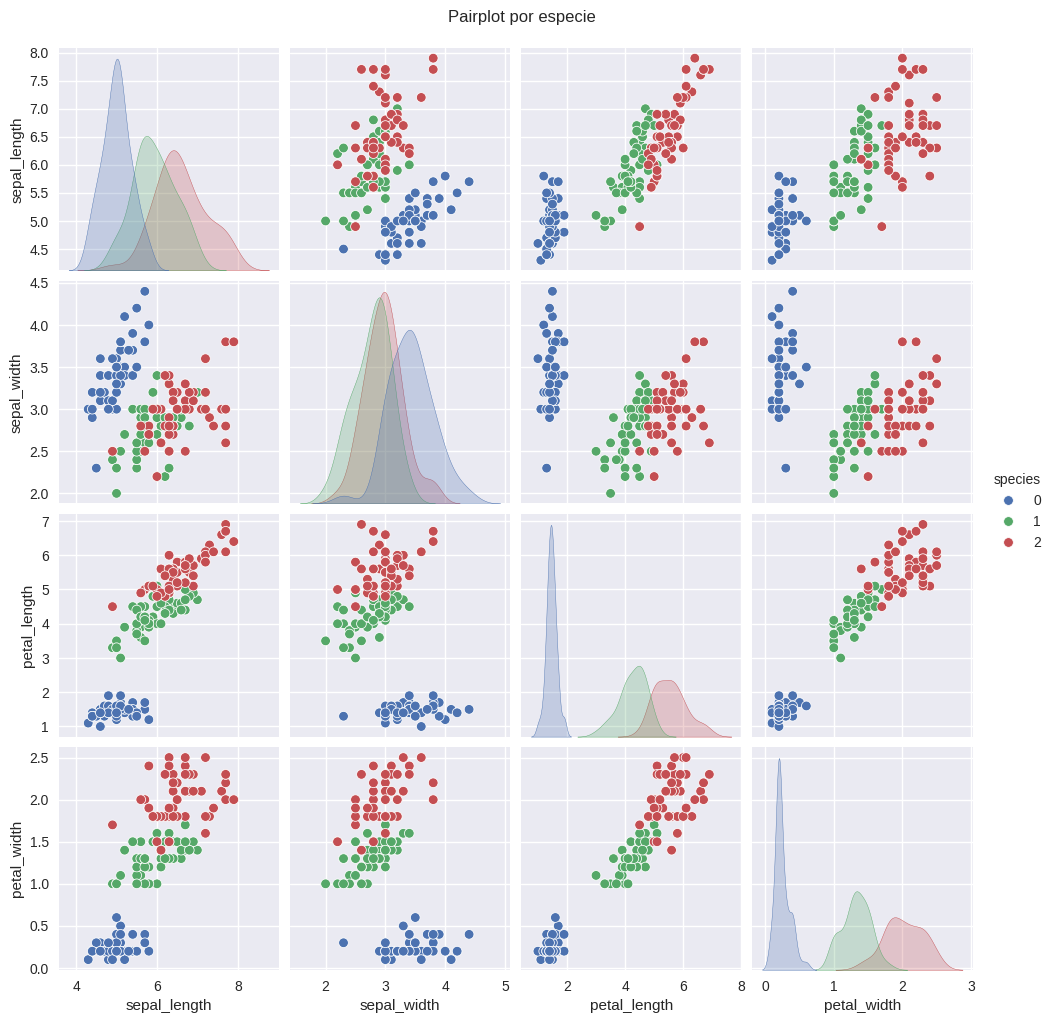

In [ ]:
# ============================================
# Perfiles automatizados (OPCIONAL)
# ============================================
from pathlib import Path
import seaborn as sns, matplotlib.pyplot as plt

# Rutas de salida
REPORT_DIR = Path("results")
PLOTS_DIR  = Path("results/visualizaciones")
REPORT_DIR.mkdir(parents=True, exist_ok=True)
PLOTS_DIR.mkdir(parents=True, exist_ok=True)

# Instalar y generar reporte HTML con ydata-profiling
!pip -q install ydata-profiling
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title='Iris – Profile', minimal=True)
profile.to_file(REPORT_DIR / "profile_iris.html")  # guarda HTML

# =======================
# Ejemplo de guardado en Colab
# =======================
plt.style.use('seaborn-v0_8')

# Correlaciones
corr = df.select_dtypes('number').corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Matriz de correlaciones (Pearson)')
plt.xlabel('Variables'); plt.ylabel('Variables')
plt.tight_layout()
plt.savefig(PLOTS_DIR / 'corr.png', dpi=200, bbox_inches='tight')
plt.close()

# Pairplot (puede demorar en Colab)
pair = sns.pairplot(df, hue='species', diag_kind='kde')
pair.fig.suptitle('Pairplot por especie', y=1.02)
pair.savefig(PLOTS_DIR / 'pairplot.png', dpi=200, bbox_inches='tight')

## Diccionario de datos (plantilla)

In [ ]:
import pandas as pd
from pathlib import Path

# Crear carpeta de resultados si no existe
REPORT_DIR = Path("results/reportes")
REPORT_DIR.mkdir(parents=True, exist_ok=True)

# Diccionario de datos manual para el dataset Iris
data_dict = pd.DataFrame({
    "nombre": ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"],
    "tipo": ["float", "float", "float", "float", "category"],
    "unidad": ["cm", "cm", "cm", "cm", "—"],
    "descripción": [
        "Largo del sépalo",
        "Ancho del sépalo",
        "Largo del pétalo",
        "Ancho del pétalo",
        "Especie de la flor"
    ],
    "notas": [
        "Medida continua",
        "Medida continua",
        "Medida continua",
        "Medida continua",
        "Tres categorías balanceadas"
    ]
})

# Guardar en formato Markdown
md_table = data_dict.to_markdown(index=False)
with open(REPORT_DIR / "data_dictionary.md", "w", encoding="utf-8") as f:
    f.write("# Diccionario de Datos – Dataset Iris\n\n")
    f.write(md_table)

print("✅ Diccionario de datos guardado en results/reportes/data_dictionary.md")

✅ Diccionario de datos guardado en results/reportes/data_dictionary.md


In [ ]:
# === 10) Insights (solo referencia en notebook) ===
print("Ver README.md para los insights redactados.")

Ver README.md para los insights redactados.
